In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 다시시작

In [ ]:
!pip install konlpy > /dev/null

In [ ]:
from google.colab import files
uploaded= files.upload()
filename= list(uploaded.keys())[0]
filename

Saving e약은요정보검색.xlsx to e약은요정보검색 (1).xlsx


'e약은요정보검색.xlsx'

In [ ]:
import numpy as np
import re

In [ ]:
import pandas as pd
raw_df = pd.read_excel(filename)
raw_df.head(1)

,품목일련번호,제품명,업체명,주성분,이 약의 효능은 무엇입니까?,이 약은 어떻게 사용합니까?,이 약을 사용하기 전에 반드시 알아야 할 내용은 무엇입니가?,이 약의 사용상 주의사항은 무엇입니까?,이 약을 사용하는 동안 주의해야 할 약 또는 음식은 무엇입니까?,이 약은 어떤 이상반응이 나타날 수 있습니까?,이 약은 어떻게 보관해야 합니까?,공개일자,수정일자
0,200300406,닥터베아제정,(주)대웅제약,"디아스타제·프로테아제·셀룰라제,판셀라제,크리아제-PEG,디아스타제·프로테아제100,...","이 약은 소화불량, 식욕감퇴(식욕부진), 과식, 체함, 소화촉진, 소화불량으로 인한...",성인 1회 1정을 1일 3회 식후에 복용합니다.,NaN,만 7세 이하의 소아는 이 약을 복용하지 마십시오.이 약을 복용하기 전에 알레르기 ...,NaN,NaN,습기와 빛을 피해 실온에서 보관하십시오.어린이의 손이 닿지 않는 곳에 보관하십시오.,2020-12-24,2021-01-29


In [ ]:
raw_df = raw_df[['이 약의 효능은 무엇입니까?']]

In [ ]:
raw_df.to_csv('byong.txt')

In [ ]:
with open('byong.txt') as fp:
  text = fp.read()

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
tokens = okt.nouns(text)

In [ ]:
import nltk
nltk.download('punk')
nltk.download('stopwords')

[nltk_data] Error loading punk: Package 'punk' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from collections import Counter 

In [ ]:
stopwords ="""
  이 약 효능 무엇 약은 사용합니다 인한 시 사용 증 질환 입 염 의 및
  증상 완화 통 후 등 보급 어깨 눈 피부 임신 유기 치료 병후 불량
  명중 육체 체력 예방 노년기 과 동안 회복 병 수술 감 장애 기
  보조 여러 결핍 골 힘줄 급 퇴 행성 뼈 기 속 이의 입안 입술
  속 인후 코 건 티 위 수족 류마 위산
"""

stop_words = stopwords.split()
new_tokens =[word for word in tokens if word not in stop_words]
token_count = Counter(new_tokens)

In [ ]:
token_count.keys()

dict_keys(['소화', '식욕', '감퇴', '식욕부진', '과식', '체함', '촉진', '위부', '팽', '급성', '상기', '감염', '발열', '해열', '기관지염', '기관지', '천식', '후두', '부비동염', '낭성', '섬유', '객담', '배출', '곤란', '감기', '통증', '요통', '신경통', '류마티스', '타박상', '염좌', '삠', '근육통', '관절통', '진통', '항염', '십이지장', '궤양', '위염', '구역', '구토', '위통', '신트림', '산', '작용', '개선', '만성', '호흡기', '점액', '용해', '거담', '관절염', '관절', '건초염', '상완골', '테니스', '엘', '보우', '외상', '후의', '종창', '두통', '월경', '삔', '치통', '피로', '병중', '저하', '발육', '비타민', '구루병', '각기', '꼬리염', '구내염', '설염', '혀염', '습진', '피부염', '아연', '구강', '내', '살균', '소독', '인두', '발치', '구내', '구취', '공급', '보충', '수', '셀레늄', '환자', '자양', '상처', '화상', '창', '상의', '농양', '부위', '주사', '터', '남성', '성기', '촉각', '예민', '감소', '간질', '환의', '간염', '독성', '코감기', '알레르기', '혈관', '운동', '코염', '재채기', '콧물', '눈물', '환', '간경변', '벌레', '가려움', '두드러기', '땀띠', '동창', '복부', '지연', '트림', '내시경', '검사', '장내', '포', '제거', '선', '촬영', '가스', '위장', '관내', '공기', '연하', '식도역류', '헤르니아', '틈새', '탈장', '십이지', '장염', '어서', '소화기', '능이', '복통', '과민성', '대장', '증후군', '경련', '결장', '소아', '습관성', '비감', '염성', '장

In [ ]:
df = pd.DataFrame(columns=['증상', '개수'])
df['증상']= token_count.keys()
df['개수']= token_count.values()

In [ ]:
df_count = df.sort_values(by='개수',ascending=False).head(100)
df_count.reset_index(drop=True)

,증상,개수
0,통증,1151
1,근육통,1149
2,관절염,921
3,피로,920
4,관절통,862
...,...,...
95,건염,155
96,상완골,154
97,보우,151
98,화상,150


In [ ]:
df_count.to_csv('count.csv')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

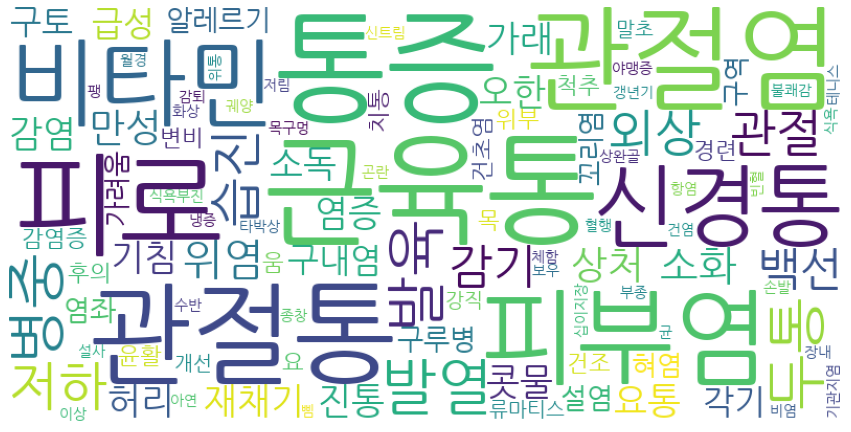

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(token_count)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()